In [1]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras import regularizers
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
train_data.shape

(60000, 28, 28)

In [4]:
train_data.dtype

dtype('uint8')

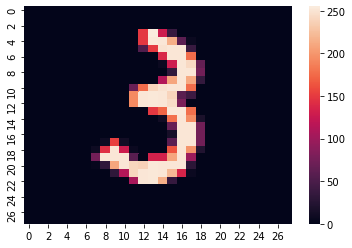

In [5]:
sns.heatmap(train_data[1234])

In [6]:
train_labels[1234]

3

In [7]:
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

In [8]:
X_train, X_val = train_data[:50000].astype('float16') / 255, train_data[50000:].astype('float16') / 255
y_train, y_val = train_labels[:50000], train_labels[50000:]

# Dense layers

In [9]:
models_dl = dict()

In [10]:
X_train = X_train.reshape((50000, -1, ))
X_val = X_val.reshape((10000, -1,))
X_val.shape

(10000, 784)

In [11]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1], )))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time
models_dl['model_dl 64-10'] = model1.fit(X_train, 
                            y_train,
                            epochs = 20,
                            batch_size = 64,
                            validation_data = (X_val, y_val))

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.5924 - accuracy: 0.8405 - val_loss: 0.2179 - val_accuracy: 0.9372
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 0.1997 - accuracy: 0.9427 - val_loss: 0.1646 - val_accuracy: 0.9525
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 0.1502 - accuracy: 0.9558 - val_loss: 0.1365 - val_accuracy: 0.9624
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 0.1218 - accuracy: 0.9649 - val_loss: 0.1264 - val_accuracy: 0.9629
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 0.1032 - accuracy: 0.9699 - val_loss: 0.1149 - val_accuracy: 0.9677
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0865 - accuracy: 0.9745 - val_loss: 0.1079 - val_accuracy: 0.9684
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0744 - accuracy: 0.9781 - val_loss: 0.1124 - val_accuracy: 0.9687
Epoch 

# %%time

model2 = models.Sequential()
model2.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1], )))
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(10, activation = 'softmax'))
model2.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

models_dl['model_dl 64-64-10'] = model2.fit(X_train, 
                                            y_train,
                                            epochs = 20,
                                            batch_size = 64,
                                            validation_data = (X_val, y_val))

In [31]:
%%time

model3 = models.Sequential()
model3.add(layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1], )))
model3.add(layers.Dense(64, activation = 'relu'))
model3.add(layers.Dense(10, activation = 'softmax'))
model3.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

models_dl['model_dl 128-64-10'] = model3.fit(X_train, 
                                            y_train,
                                            epochs = 20,
                                            batch_size = 64,
                                            validation_data = (X_val, y_val))

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.5005 - accuracy: 0.8554 - val_loss: 0.1576 - val_accuracy: 0.9512
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 0.1362 - accuracy: 0.9606 - val_loss: 0.1476 - val_accuracy: 0.9567
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0883 - accuracy: 0.9731 - val_loss: 0.1147 - val_accuracy: 0.9662
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0995 - val_accuracy: 0.9714
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0534 - accuracy: 0.9838 - val_loss: 0.0913 - val_accuracy: 0.9752
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0977 - val_accuracy: 0.9751
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0986 - val_accuracy: 0.9743
Epoch 

In [15]:
%%time

model3 = models.Sequential()
model3.add(layers.Dense(256, activation = 'relu', input_shape = (X_train.shape[1], )))
model3.add(layers.Dense(128, activation = 'relu'))
model3.add(layers.Dense(64, activation = 'relu'))
model3.add(layers.Dense(10, activation = 'softmax'))
model3.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

models_dl['model_dl 256-128-64-10'] = model3.fit(X_train, 
                                            y_train,
                                            epochs = 20,
                                            batch_size = 64,
                                            validation_data = (X_val, y_val))

Epoch 1/20
782/782 [==============================] - 5s 5ms/step - loss: 0.4521 - accuracy: 0.8629 - val_loss: 0.1182 - val_accuracy: 0.9651
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1052 - accuracy: 0.9677 - val_loss: 0.0916 - val_accuracy: 0.9730
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0686 - accuracy: 0.9785 - val_loss: 0.0985 - val_accuracy: 0.9738
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0957 - val_accuracy: 0.9751
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0396 - accuracy: 0.9885 - val_loss: 0.0944 - val_accuracy: 0.9759
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0982 - val_accuracy: 0.9784
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.1044 - val_accuracy: 0.9784
Epoch 

In [16]:
%%time

model4 = models.Sequential()
model4.add(layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1], ), kernel_regularizer = regularizers.l2(0.001)))
model4.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model4.add(layers.Dense(10, activation = 'softmax'))
model4.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

models_dl['model_dl_reg 128-64-10'] = model4.fit(X_train, 
                                            y_train,
                                            epochs = 20,
                                            batch_size = 64,
                                            validation_data = (X_val, y_val))

Epoch 1/20
782/782 [==============================] - 5s 5ms/step - loss: 0.7078 - accuracy: 0.8573 - val_loss: 0.3519 - val_accuracy: 0.9384
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.3029 - accuracy: 0.9509 - val_loss: 0.2479 - val_accuracy: 0.9626
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2391 - accuracy: 0.9632 - val_loss: 0.2177 - val_accuracy: 0.9669
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.2090 - accuracy: 0.9655 - val_loss: 0.2031 - val_accuracy: 0.9682
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1852 - accuracy: 0.9715 - val_loss: 0.1853 - val_accuracy: 0.9695
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1744 - accuracy: 0.9731 - val_loss: 0.1687 - val_accuracy: 0.9724
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1652 - accuracy: 0.9738 - val_loss: 0.1804 - val_accuracy: 0.9701
Epoch 

In [44]:
def print_plot_loss_accuracy(history, model_name = None, ax1 = None, ax2 = None):
    
        min_val_loss = min(history.history['val_loss'])
        epoch_min_val_loss = history.history['val_loss'].index(min_val_loss)
        max_val_accuracy = max(history.history['val_accuracy'])
        epoch_max_val_accuracy = history.history['val_accuracy'].index(max_val_accuracy)
        if model_name:
            print(f"Model: {model_name}")
        print(f"Min val_loss: {round(min_val_loss, 3)} ({epoch_min_val_loss} epoch)")
        print(f"Max val_accuracy: {round(max_val_accuracy, 3)} ({epoch_max_val_accuracy} epoch)\n")
        
        if not (ax1 and ax2):
            _, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
        
        x = range(len(history.history['loss']))

        sns.lineplot(x, history.history['loss'], ax = ax1)
        sns.lineplot(x, history.history['val_loss'], ax = ax1)
        ax1.legend(['loss', 'val_loss'])
        if model_name:
            ax1.set_title(model_name)

        sns.lineplot(x, history.history['accuracy'], ax = ax2)
        sns.lineplot(x, history.history['val_accuracy'], ax = ax2)
        ax2.legend(['accuracy', 'val_accuracy'])
        if model_name:
            ax2.set_title(model_name)

            
def plot_models_loss_accuracy(models):
    _, axes = plt.subplots(len(models) + 1, 2, figsize = (15, 5 * len(models)))

    for i, (key, history) in enumerate(models.items()):
        x = range(len(history.history['loss']))
        
        print_plot_loss_accuracy(history, key, axes[i, 0], axes[i, 1])
        sns.lineplot(x, history.history['val_loss'], ax = axes[-1, 0])
        sns.lineplot(x, history.history['val_accuracy'], ax = axes[-1, 1])

    axes[-1, 0].set_title('loss models')
    axes[-1, 0].legend(models.keys())

    axes[-1, 1].set_title('accuracy models')
    axes[-1, 1].legend(models.keys())


Model: model_dl 64-10
Min val_loss: 0.101 (10 epoch)
Max val_accuracy: 0.974 (12 epoch)

Model: model_dl 256-128-64-10
Min val_loss: 0.092 (1 epoch)
Max val_accuracy: 0.982 (18 epoch)

Model: model_dl_reg 128-64-10
Min val_loss: 0.143 (19 epoch)
Max val_accuracy: 0.975 (16 epoch)

Model: model_dl 128-64-10
Min val_loss: 0.091 (4 epoch)
Max val_accuracy: 0.978 (17 epoch)



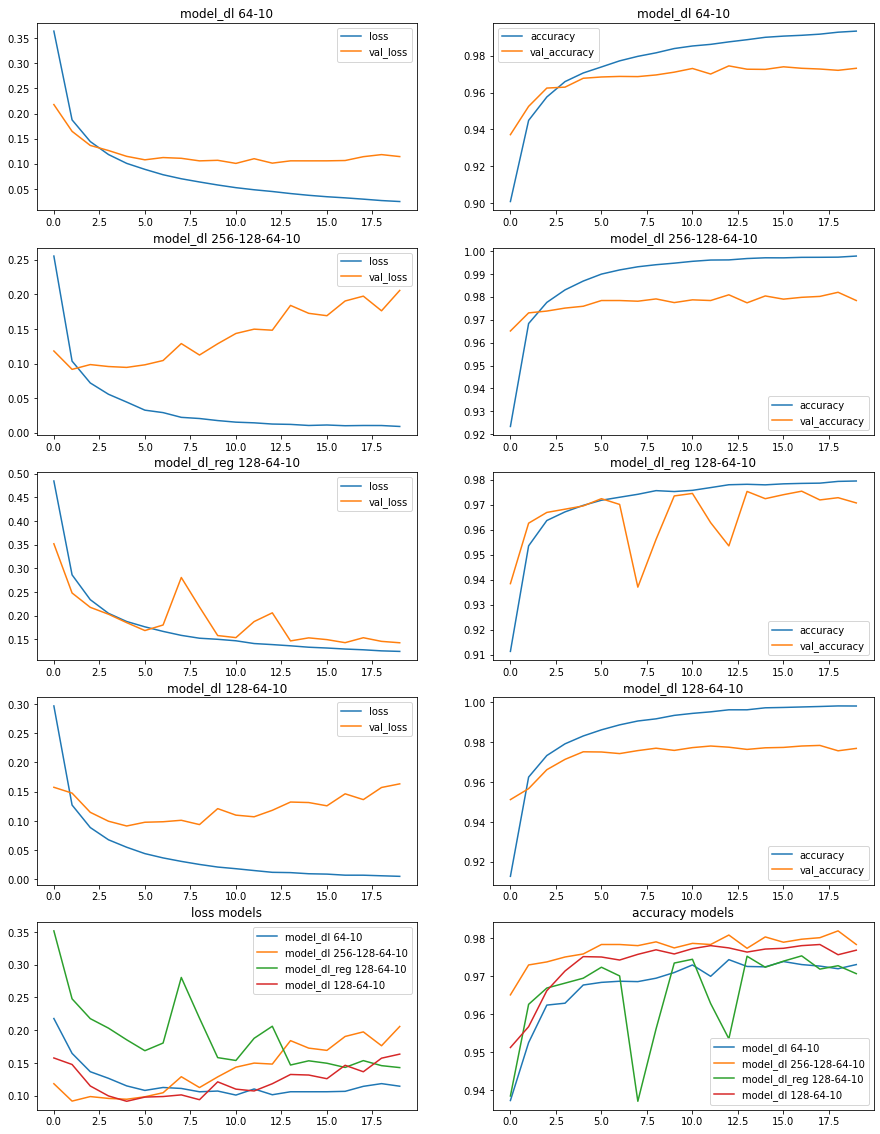

In [43]:
plot_models_loss_accuracy(models_dl)

# Convolution model

In [49]:
X_train2, X_val2 = train_data[:50000].astype('float16') / 255, train_data[50000:].astype('float16') / 255
y_train2, y_val2 = train_labels[:50000], train_labels[50000:]

In [80]:
X_train2, X_val2 = X_train2.reshape(50000, 28, 28, 1), X_val2.reshape(10000, 28, 28, 1)

In [81]:
X_train2.shape

(50000, 28, 28, 1)

In [82]:
model_conv = models.Sequential()
model_conv.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3)))
model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(64, activation = 'relu'))
model_conv.add(layers.Dense(10, activation = 'softmax'))


# model5.add(layers.Dense(128, activation = 'relu', input_shape = (28,28, 1), kernel_regularizer = regularizers.l2(0.001)))
# model5.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
# model5.add(layers.Dense(10, activation = 'softmax'))
# model5.compile(optimizer = 'rmsprop',
#                   loss = 'categorical_crossentropy',
#                   metrics = ['accuracy'])

# model5_history = model5.fit(X_train2, 
#                                             y_train2,
#                                             epochs = 20,
#                                             batch_size = 64,
#                                             validation_data = (X_val2, y_val2))

In [83]:
model_conv.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)              

In [86]:
model_conv.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

In [87]:
%%time
model_conv.fit(X_train2,
               y_train2,
               epochs = 10,
               batch_size = 64,
               validation_data = (X_val2, y_val2))

Epoch 1/10
782/782 [==============================] - 22s 27ms/step - loss: 0.4550 - accuracy: 0.8589 - val_loss: 0.1456 - val_accuracy: 0.9551
Epoch 2/10
782/782 [==============================] - 21s 26ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.0478 - val_accuracy: 0.9869
Epoch 3/10
782/782 [==============================] - 24s 30ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0463 - val_accuracy: 0.9870
Epoch 4/10
782/782 [==============================] - 20s 26ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0744 - val_accuracy: 0.9780
Epoch 5/10
782/782 [==============================] - 20s 25ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0499 - val_accuracy: 0.9882
Epoch 6/10
782/782 [==============================] - 19s 24ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0468 - val_accuracy: 0.9888
Epoch 7/10
782/782 [==============================] - 19s 24ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0416 - val_accuracy:

Min val_loss: 0.042 (6 epoch)
Max val_accuracy: 0.99 (6 epoch)



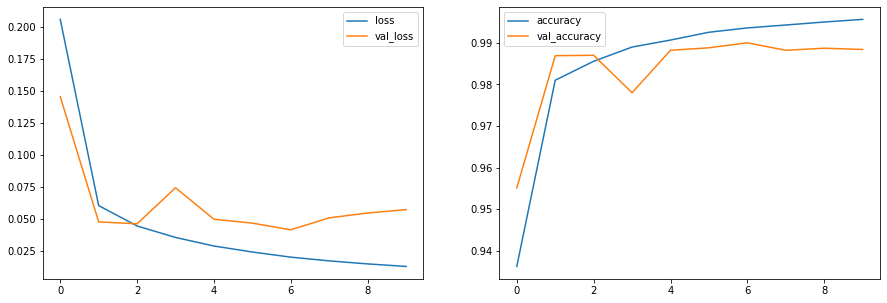

In [95]:
print_plot_loss_accuracy(model_conv.history)

In [102]:
model_conv_reg = models.Sequential()
model_conv_reg.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1), kernel_regularizer = regularizers.l2(0.001)))
model_conv_reg.add(layers.MaxPooling2D((2, 2)))
model_conv_reg.add(layers.Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model_conv_reg.add(layers.MaxPooling2D((2, 2)))
model_conv_reg.add(layers.Conv2D(64, (3, 3), kernel_regularizer = regularizers.l2(0.001)))
model_conv_reg.add(layers.Flatten())
model_conv_reg.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model_conv_reg.add(layers.Dense(10, activation = 'softmax'))

model_conv_reg.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)              

In [103]:
%%time
model_conv_reg.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

model_conv_reg.fit(X_train2,
                   y_train2,
                   epochs = 10,
                   batch_size = 64,
                   validation_data = (X_val2, y_val2))

Epoch 1/10
782/782 [==============================] - 22s 26ms/step - loss: 0.6183 - accuracy: 0.8588 - val_loss: 0.2562 - val_accuracy: 0.9552
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 0.1793 - accuracy: 0.9769 - val_loss: 0.1635 - val_accuracy: 0.9759
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 0.1371 - accuracy: 0.9805 - val_loss: 0.1267 - val_accuracy: 0.9819
Epoch 4/10
782/782 [==============================] - 20s 26ms/step - loss: 0.1172 - accuracy: 0.9833 - val_loss: 0.1147 - val_accuracy: 0.9841
Epoch 5/10
782/782 [==============================] - 20s 26ms/step - loss: 0.1084 - accuracy: 0.9850 - val_loss: 0.1161 - val_accuracy: 0.9810
Epoch 6/10
782/782 [==============================] - 21s 26ms/step - loss: 0.1052 - accuracy: 0.9838 - val_loss: 0.1062 - val_accuracy: 0.9844
Epoch 7/10
782/782 [==============================] - 20s 26ms/step - loss: 0.0981 - accuracy: 0.9852 - val_loss: 0.0970 - val_accuracy:

Min val_loss: 0.094 (9 epoch)
Max val_accuracy: 0.986 (9 epoch)



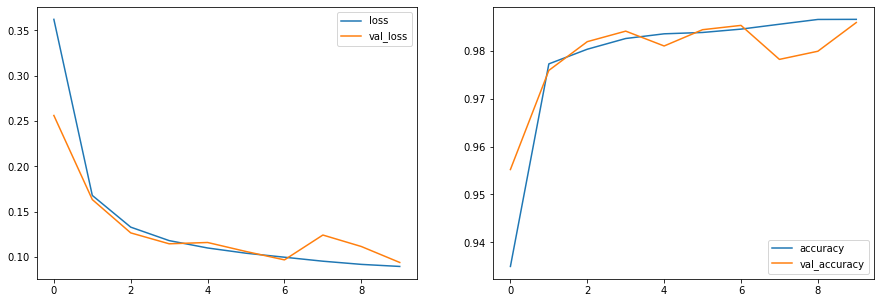

In [104]:
print_plot_loss_accuracy(model_conv_reg.history)

# Власні цифри

In [135]:
from PIL import Image, ImageOps

In [175]:
image1 = Image.open('Own image/n5.jpg')
print(image1.format)
print(image1.size)
print(image1.mode)
image1

JPEG
(28, 28)
RGB


In [176]:
image1 = ImageOps.grayscale(image1)
image1 = np.array(image1).reshape((1, 28, 28, 1))

# приводимо у правильне відображення (значення від 0 до 1 відповідно до віддінку сірого)
image1 = abs(image1.astype('float16') - 255)/255

image1.shape

(1, 28, 28, 1)

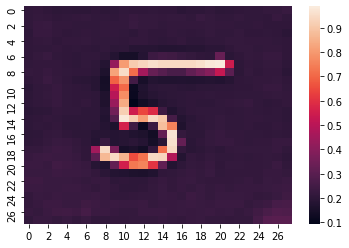

In [209]:
sns.heatmap(image1.reshape((28, 28)))

In [210]:
img1_predict = model_conv.predict(image1)
img1_predict.round(3)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

Як бачемо, цифра "5" розпізнана з максимальною точністю